Jack Nealon and Ryder Gallagher  
CPSC 222 - Dr. Gina Sprint - Gonzaga University  
12/6/2022

# Quantified Group Project - Music Streaming 
In this report, we are going to analyze my Spotify streaming data for the past year and calculate statistics depending on the information provided by Spotify. Included in this report, we are able to read in the history, clean it by replacing missing values, categorizing information, and adding additional supplemental information. From this we are then able to calcuate our statistcs and present them visually using tables and graphs.
1. Load the data
2. Clean the data
3. Visualize the data

### 1. Load the Data

In [1]:
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read in the raw, unprocessed data into a pandas dataframe
temp1_df = pd.read_json("JackStreamHist1.json")
temp2_df = pd.read_json("JackStreamHist2.json")
jack_df = pd.concat([temp1_df, temp2_df], ignore_index=True)

                        artistName  \
0                            ASKII   
1      Raiders Of The Lost Podcast   
2                            Sueco   
3                     All Time Low   
4                      $uicideboy$   
...                            ...   
12612                   Piff Marti   
12613                 Double A-Ron   
12614                 Sick Puppies   
12615                   PawPaw Rod   
12616                    Joey Trap   

                                               trackName  msPlayed  \
0                                             Aurora Sky    20.695   
1                              TENET - Review & Analysis  1719.345   
2                                              Paralyzed   162.805   
3                             Monsters (feat. blackbear)   174.067   
4      ...And to Those I Love, Thanks for Sticking Ar...   168.489   
...                                                  ...       ...   
12612                                      Free Yours

Information Collected Includes:
1. Date and Time (string)
1. Artist (string)
1. Track Name (string)
1. Minutes Played (integer)

### 2. Clean the Data

In [2]:
jack_df.fillna(np.nan, inplace=True)
jack_df[['Date','Time']] = jack_df.endTime.str.split(expand=True)
jack_df = jack_df.drop('endTime', axis=1)
jack_df['msPlayed'] = jack_df['msPlayed'] / 1000
print(jack_df)

                        artistName  \
0                            ASKII   
1      Raiders Of The Lost Podcast   
2                            Sueco   
3                     All Time Low   
4                      $uicideboy$   
...                            ...   
12612                   Piff Marti   
12613                 Double A-Ron   
12614                 Sick Puppies   
12615                   PawPaw Rod   
12616                    Joey Trap   

                                               trackName  msPlayed  \
0                                             Aurora Sky    20.695   
1                              TENET - Review & Analysis  1719.345   
2                                              Paralyzed   162.805   
3                             Monsters (feat. blackbear)   174.067   
4      ...And to Those I Love, Thanks for Sticking Ar...   168.489   
...                                                  ...       ...   
12612                                      Free Yours

What are we cleaning: 
1. Splitting columns with multiple values into separate columns (and deleting the combined column we extracted values from)
1. Filling all missing values with the np.nan value  

To-do cleaning:
1. Add the artist's genre (using Dr. Sprints spotify artist-genre program/function)
1. Add a season column (use the date to correlate it's season)
1. Date the song/podcast was released ()

Information Collected after cleaning:
1. Date (string)
1. Time (string)
1. Artist (string)
1. Track Name (string)
1. Milliseconds Played (integer)

Almost there:
- artist genre (string)
- season when it was played (string)
- release date (integer)

### 3. Aggregate the data and compute summary statistics

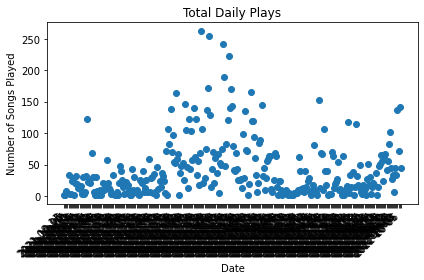

In [3]:
dates_df = jack_df["Date"].value_counts(sort=False)
plt.scatter(dates_df.index, dates_df)
plt.xticks(ha="right", rotation=45)
plt.title("Total Daily Plays")
plt.xlabel("Date")
plt.ylabel("Number of Songs Played")
plt.tight_layout()

I included the above total daily plays dispite the unreadable x-axis because it is in order and shows the seasonal relationship. Its obvious that just to the left of the middle there is a massive increase in my total daily plays, just need to figure out how to keep all my scatter plots but put in x-axis variable names representing the months/seasons (or major events, like that massive increase might be when I decided to take my gap year and started working in a kitchen (which it probably was))

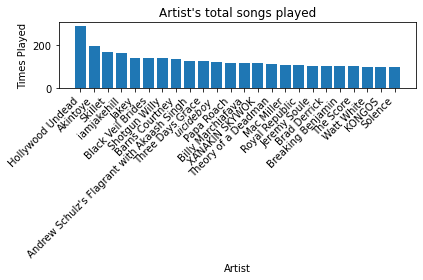

In [4]:
#BAR GRAPH - my graph that isnt scatter/line/histogram
artists_df = jack_df["artistName"].value_counts()
plt.bar(artists_df.index[0:24], artists_df[0:24])
plt.xticks(rotation=45, ha="right")
plt.title("Artist's total songs played")
plt.xlabel("Artist")
plt.ylabel("Times Played")
plt.tight_layout()

Yo, I didnt know how much Hollywood undead I listened to... dang. I didnt even go through a phase or a noticeable time where I was playing a crap ton of hollywood undead, the same with iamjakehill. This is weird, even I didnt know what my most played music was. If I had to make a list having never seen these numbers, I would probably identify probably 10-12 listed which is insane.  

### Save spotify information to csv file

In [5]:
jack_df.to_csv("JackCleanedData.csv")